In [80]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns



In [3]:
filepath = '../test/Output.log'

In [4]:
# stores tuple of process at each time step
process = [];
nIter = 0;

In [5]:
f = open (filepath, "r")

# Looking for the number of iterations
for l in f:
    line = l.strip()
    if (line[0] == "Running" and line[2] == "iterations"):
        nIter = int(line[2])
        f.close()
        break

In [42]:
# Dimensions of the lattice
(x, y) = (10, 10)
started = False
ts = 0;
nextIsProcessName = False;
nextLatticeHeight = False;
#Initialize layer
layer = []

#Initialize results
results = []

f = open(filepath, "r")

# Iterate through each time step
for l in f:
    line = l.split()
    if ((not started) and line[0] == "Time"):
        started = True
    if (line[0] == "Time" and line[1] == "step:"):
        ts = int(line[2])
        nextIsProcessName = True;
        continue
    elif (nextIsProcessName):
        process.append((ts, line[0]))
        nextIsProcessName = False
    elif (not nextLatticeHeight and line[0] == "---------------------------------------"):
        nextLatticeHeight = True
    elif (nextLatticeHeight and line[0] == "---------------------------------------"):
        results.append(layer)
        layer = []
        nextLatticeHeight = False
    elif(nextLatticeHeight):
        layer.append(line)
results = np.array(results)


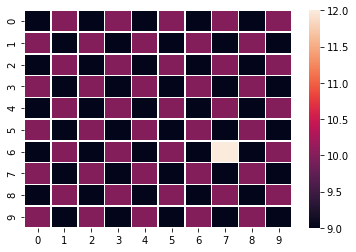

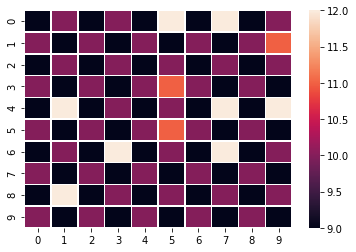

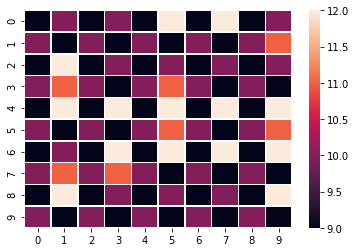

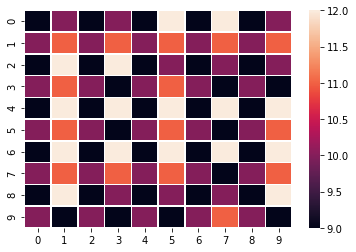

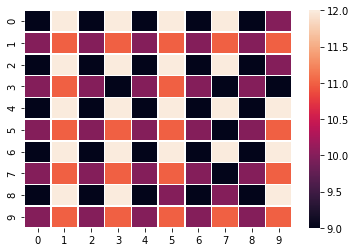

In [82]:
for i in range(0, 50, 10):
    layer = results[i, :, :]

    result = np.zeros((x, y))
    for i in range(x):
        for j in range(y):
            result[i, j] = int(layer[i, j])
    ax = sns.heatmap(result, linewidth=0.5)
    plt.show()